# NetMHCIIpan-4.0 dataset

In [6]:
import os
import pandas as pd
login = os.getlogin( )
DATA_ROOT = f"/home/{login}/Git/tcr/data/mhc/NetMHCIIpan_train/"

In [ ]:
# the following files are the 5 different splits of the whole dataset
# they can be downloaded from https://services.healthtech.dtu.dk/suppl/immunology/NAR_NetMHCpan_NetMHCIIpan/
# we do not provide these splits in our repository
files = [
    "train_BA1.txt",
    "train_BA2.txt",
    "train_BA3.txt",
    "train_BA4.txt",
    "train_BA5.txt",
    "test_BA1.txt",
    "test_BA2.txt",
    "test_BA3.txt",
    "test_BA4.txt",
    "test_BA5.txt",
]

pseudoseq = pd.read_csv(DATA_ROOT+'pseudosequence.2016.all.X.dat', header=None, sep='\t').rename(columns={0: 'hla', 1: 'pseudoseq'})
hla_2_pseudoseq = dict(zip(pseudoseq.hla, pseudoseq.pseudoseq))

for f in files:
    df = pd.read_csv(DATA_ROOT+f, sep="\t", header=None)
    df = df.rename(columns={0: 'peptide', 1: 'BA', 2: 'mhc', 3: 'nd'})
    df = df.drop(columns=['nd']).reset_index(drop=True)
    df['mhc'] = df['mhc'].apply(lambda x: hla_2_pseudoseq[x])
    df.to_csv(DATA_ROOT+f, index=False)

In [2]:
# we consider one single train/test split and merge
# this allows to consider the whole dataset
# we then create our own splits in the training loops
df_train = pd.read_csv(DATA_ROOT+"train_BA1.txt")
df_test = pd.read_csv(DATA_ROOT+"test_BA1.txt")
df = pd.concat([df_train, df_test])
df.to_csv(DATA_ROOT+"netmhcIIpan4.csv", index=False)
len(df)

108959

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

FIGURES_BASE = "/home/nle-fgrazioli/Git/tcr/notebooks/notebooks.regression/figures/"

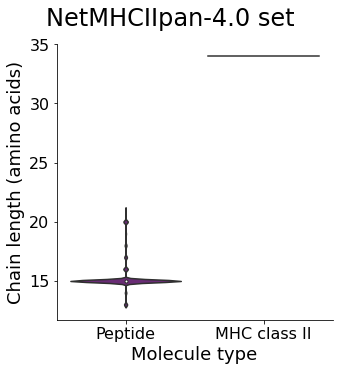

In [23]:
sns.set_palette('magma', 2)
sequences = df.peptide.to_list() + df.mhc.to_list()
label = ['Peptide']*len(df) + ['MHC class II']*len(df)

df = pd.DataFrame({'Sequence': sequences, 'Molecule type': label})
df['Chain length (amino acids)'] = df['Sequence'].apply(lambda x: len(x))
plot = sns.catplot(data=df, y='Chain length (amino acids)', x='Molecule type', kind='violin')
plot.fig.suptitle("NetMHCIIpan-4.0 set", y=1.04)
plt.savefig(FIGURES_BASE + "violins-pMHC.svg", format='svg', dpi=300, bbox_inches='tight')
plt.savefig(FIGURES_BASE + "violins-pMHC.png", format='png', dpi=300, bbox_inches='tight')

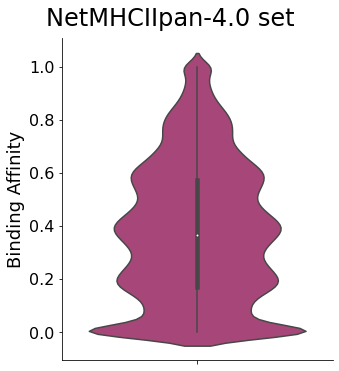

In [27]:
sns.set_palette('magma', 1)
ba = df.BA.to_list()
label = ['']*len(df)

df = pd.DataFrame({'Binding Affinity': ba, '': label})
plot = sns.catplot(data=df, y='Binding Affinity', x='', kind='violin')
plot.fig.suptitle("NetMHCIIpan-4.0 set", y=1.04)
plt.savefig(FIGURES_BASE + "violins-pMHC.BA.svg", format='svg', dpi=300, bbox_inches='tight')
plt.savefig(FIGURES_BASE + "violins-pMHC.BA.png", format='png', dpi=300, bbox_inches='tight')